In [210]:
import pandas as pd

In [211]:
data = pd.read_excel('Dataset/Date_Fruit_Datasets.xlsx')

In [212]:
data.shape

(898, 35)

In [213]:
data.head(3)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI


In [214]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

In [215]:
data.Class.describe()

count       898
unique        7
top       DOKOL
freq        204
Name: Class, dtype: object

In [216]:
data.Class.unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [217]:
X = data.drop('Class', axis='columns')
X.shape

(898, 34)

In [218]:
y = data.Class
y.shape

(898,)

In [219]:
y[0]

'BERHI'

In [220]:
y[100]

'DEGLET'

In [221]:
y[500]

'ROTANA'

In [222]:
y_names = data.Class.unique()
y_names

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [223]:
class_num = [0, 1, 2, 3, 4, 5, 6]

In [224]:
y.replace(y_names, class_num, inplace=True)

In [225]:
y_names[y[0]]

'BERHI'

In [226]:
y_names[y[100]]

'DEGLET'

In [227]:
y_names[y[500]]

'ROTANA'

In [228]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [230]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

d:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9166666666666666

In [231]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTC.score(X_test, y_test)

0.8555555555555555

In [232]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=90)
RFC.fit(X_train, y_train)
RFC.score(X_test, y_test)

0.9388888888888889

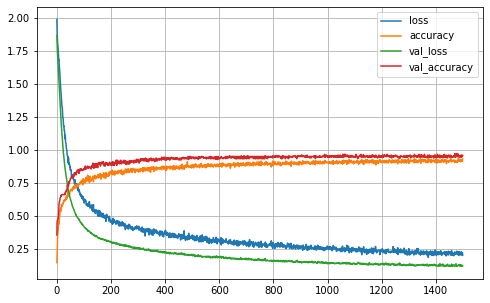

6/6 [==============================] - 0s 6ms/step - loss: 0.1253 - accuracy: 0.9556


[0.12528011202812195, 0.9555555582046509]

In [237]:
import keras
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

NN = keras.Sequential([
    keras.layers.Dense(400, activation='relu', input_shape=(34,)),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(100, activation='relu',),
    keras.layers.Dense(7, activation='softmax')
])

NN.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = NN.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 1500,
    #callbacks=[early_stopping],
    verbose = 0
)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

NN.evaluate(X_test, y_test)

In [235]:
import joblib

joblib.dump(LR, 'Models/LR.joblib')
joblib.dump(DTC, 'Models/DTC.joblib')
joblib.dump(RFC, 'Models/RFC.joblib')
NN.save('Models/NN.h5')